In [112]:
import pandas as pd
import numpy as np

dftimed11 = pd.read_csv('dftimed11.csv')

In [113]:
maskmandate1 = pd.read_csv('/content/maskmandate.csv')

In [114]:
maskmandate1['Requirement Date'] = pd.to_datetime(maskmandate1['Requirement Date'], infer_datetime_format=True)

In [115]:
dftimed11['date'].value_counts()

2020-12-21    3218
2020-12-14    3218
2020-12-15    3218
2020-12-25    3218
2020-12-22    3218
              ... 
2020-01-25       3
2020-01-24       2
2020-01-21       1
2020-01-22       1
2020-01-23       1
Name: date, Length: 348, dtype: int64

In [116]:
len(dftimed11)

882946

In [117]:
dfhere = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv')

dfhere.head()

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-01-10,Autauga,Alabama,1001.0,4879,54.0,4326.0,47.0,553.0,7.0
1,2021-01-10,Baldwin,Alabama,1003.0,15327,173.0,11148.0,125.0,4179.0,48.0
2,2021-01-10,Barbour,Alabama,1005.0,1658,35.0,949.0,28.0,709.0,7.0
3,2021-01-10,Bibb,Alabama,1007.0,2051,48.0,1703.0,28.0,348.0,20.0
4,2021-01-10,Blount,Alabama,1009.0,5066,77.0,3856.0,68.0,1210.0,9.0


In [118]:
exon = pd.read_csv('/content/finalizederest.csv')

In [119]:
gabba = []
for x in dfhere['county']:
  x = x.split()
  if x[-1] == 'Area':
    x.pop()
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Borough':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Municipality':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'city':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  elif x[-1] == 'Parish':
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  else:
    x = ' '.join(x)
    gabba.append(x)


In [120]:
dfhere['county'] = gabba

In [121]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [122]:
gabba = []

for x in dfhere['state']:
  gabba.append(us_state_abbrev[x])

dfhere['state'] = gabba

In [ ]:
gabba = []

for x in dfhere['county']:
  x = x.split()
  if x[-1] == 'and':
    x.pop()
    x.pop()
    x = ' '.join(x)
    gabba.append(x)
  else:
    x = ' '.join(x)
    gabba.append(x)

dfhere['county'] = gabba
gabba

In [124]:
dfhere['county'][1872] = 'New York'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
dfhere['CTYNAME'] = dfhere['county'] + ', ' + dfhere['state']

In [ ]:
x = dfhere['state'] == 'NY'

dfhere[x]

In [127]:
dfhere.sort_values(by = 'CTYNAME', inplace=True)

In [128]:
exon.sort_values(by = 'CTYNAME', inplace=True, ignore_index=True)

In [129]:
exon['POPESTIMATE'][219] = 1147532

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
exon['POPESTIMATE'][2653] = 998684

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
DFTEST = pd.merge(exon, dfhere, on='CTYNAME', how='outer', indicator=True)

In [132]:
DFTEST['date_y'].value_counts()

2021-01-10    3258
Name: date_y, dtype: int64

In [133]:
X = DFTEST['_merge'] == 'right_only'

y = DFTEST[X].index

In [134]:
DFTEST.drop(labels=y, axis=0, inplace=True)

In [135]:
x = ['date_x', 'state_x',	'fips_x',	'cases_x', 'deaths_x',	'confirmed_cases_x',	'confirmed_deaths_x',	'probable_cases_x',	'probable_deaths_x']

DFTEST.drop(labels=x, axis=1, inplace=True)

In [136]:
x = exon['CTYNAME'].duplicated()

exon[x]

,Unnamed: 0,Unnamed: 0.1,CTYNAME,STCOU,Landarea,POPESTIMATE2019,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,Unnamed: 0.1.1,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,...,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,COUNTYFP,Unnamed: 0.1.1.1,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
123,1918,1917,"Baltimore, MD",NaN,597.60,827370,NaN,NaN,NaN,23128,688,23104.0,664.0,24.0,24.0,1917.0,827370.0,391735.0,435635.0,48807.0,24751.0,24056.0,90112.0,45765.0,44347.0,39963.0,20471.0,19492.0,72391.0,35625.0,36766.0,668424.0,311075.0,357349.0,648488.0,300748.0,347740.0,317001.0,153624.0,163377.0,...,48309.0,22694.0,25615.0,49909.0,23479.0,26430.0,52695.0,24902.0,27793.0,57596.0,27149.0,30447.0,55859.0,25888.0,29971.0,45690.0,20615.0,25075.0,36158.0,16109.0,20049.0,24304.0,10217.0,14087.0,16927.0,6602.0,10325.0,22225.0,7542.0,14683.0,39.6,37.9,41.3,24005.0,1193.0,0.013,0.024,0.043,0.142,0.777
892,219,218,"Fairfax, VA",NaN,393.57,1147532,NaN,NaN,NaN,25791,609,NaN,NaN,NaN,NaN,218.0,24019.0,11808.0,12211.0,2401.0,1270.0,1131.0,2446.0,1254.0,1192.0,1059.0,519.0,540.0,2010.0,984.0,1026.0,18644.0,9027.0,9617.0,18113.0,8765.0,9348.0,9269.0,4682.0,4587.0,...,1487.0,710.0,777.0,1531.0,758.0,773.0,1529.0,755.0,774.0,1637.0,789.0,848.0,1453.0,735.0,718.0,1096.0,494.0,602.0,904.0,394.0,510.0,593.0,266.0,327.0,416.0,152.0,264.0,484.0,132.0,352.0,37.4,35.7,39.0,51059.0,2844.0,0.018,0.016,0.054,0.163,0.748
971,224,223,"Franklin, VA",NaN,683.20,56042,NaN,NaN,NaN,1178,7,NaN,NaN,NaN,NaN,223.0,7967.0,3629.0,4338.0,653.0,336.0,317.0,978.0,495.0,483.0,439.0,244.0,195.0,566.0,282.0,284.0,6110.0,2664.0,3446.0,5897.0,2554.0,3343.0,2661.0,1264.0,1397.0,...,365.0,172.0,193.0,411.0,189.0,222.0,452.0,175.0,277.0,584.0,241.0,343.0,604.0,251.0,353.0,443.0,201.0,242.0,429.0,188.0,241.0,260.0,110.0,150.0,192.0,70.0,122.0,195.0,47.0,148.0,39.5,35.4,43.1,51067.0,2849.0,0.074,0.098,0.069,0.189,0.570
2411,268,267,"Richmond, VA",NaN,216.00,230436,NaN,NaN,NaN,5840,78,NaN,NaN,NaN,NaN,267.0,230436.0,109317.0,121119.0,13338.0,6866.0,6472.0,19122.0,9663.0,9459.0,7226.0,3595.0,3631.0,26801.0,12360.0,14441.0,194312.0,90954.0,103358.0,190750.0,89193.0,101557.0,111813.0,53917.0,57896.0,...,12010.0,6002.0,6008.0,11621.0,5688.0,5933.0,12592.0,5929.0,6663.0,14346.0,6602.0,7744.0,13944.0,6330.0,7614.0,11569.0,5189.0,6380.0,7863.0,3518.0,4345.0,4926.0,2051.0,2875.0,3197.0,1180.0,2017.0,4254.0,1441.0,2813.0,34.4,33.8,35.0,51760.0,2898.0,0.060,0.031,0.092,0.275,0.541
2424,269,268,"Roanoke, VA",NaN,251.09,94186,NaN,NaN,NaN,2001,19,NaN,NaN,NaN,NaN,268.0,94186.0,45381.0,48805.0,4172.0,2172.0,2000.0,9664.0,5029.0,4635.0,4682.0,2374.0,2308.0,7236.0,3574.0,3662.0,78041.0,37015.0,41026.0,75668.0,35806.0,39862.0,32827.0,16301.0,16526.0,...,5618.0,2770.0,2848.0,6327.0,3105.0,3222.0,6150.0,2993.0,3157.0,6817.0,3309.0,3508.0,6570.0,3077.0,3493.0,6131.0,2869.0,3262.0,5417.0,2442.0,2975.0,3730.0,1656.0,2074.0,2580.0,1000.0,1580.0,2676.0,855.0,1821.0,44.4,42.5,46.2,51161.0,2899.0,0.065,0.045,0.077,0.205,0.607
2653,1630,1629,"St. Louis, MO",NaN,505.55,300576,NaN,NaN,NaN,37658,904,37658.0,904.0,NaN,NaN,1629.0,998684.0,472059.0,522146.0,58074.0,29524.0,28550.0,109183.0,55963.0,53220.0,50594.0,25656.0,24938.0,83109.0,41437.0,41672.0,801638.0,373892.0,427746.0,776354.0,360916.0,415438.0,370848.0,181385.0,189463.0,...,57411.0,27151.0,30260.0,586

In [137]:
x = DFTEST['CTYNAME'].duplicated()

DFTEST[x]

Y = [123, 124, 895, 896, 976, 977, 2432, 2419, 2663, 2665]

DFTEST.drop(labels = Y, axis=0, inplace=True)

In [138]:
DFTEST.rename(columns={'county state_y':'county state',	'fips_y':'fips', 'cases_y':'cases',	'deaths_y':'deaths',	'confirmed_cases_y':'confirmed_cases', 'confirmed_deaths_y':'confirmed_deaths',	'probable_cases_y':'probable_cases',	'probable_deaths_y':'probable_deaths'}, inplace=True)

In [139]:
x = DFTEST['CTYNAME'].duplicated()

DFTEST[x]

y = [2417, 2434]

In [140]:
DFTEST.drop(labels=y, axis=0, inplace=True)

In [141]:
DFTEST['Landarea'] = DFTEST['Landarea'].astype(float)

In [142]:
DFTEST['popdensity'] = DFTEST['POPESTIMATE']/DFTEST['Landarea']

In [143]:
dftest = DFTEST

In [144]:
def sambda(x):
  s=[]
  for j, y in enumerate(x['cases']):
    if j == 0:
      s.append(0)
      h = y
    else:
      z = y - h
      s.append(z)
      h = y
  return s




In [145]:
a = dftimed11['fips'].value_counts()
b = a.index

In [ ]:
for m, x in enumerate(b):
  y = dftimed11['fips'] == x
  z = dftimed11[y]
  z.sort_values(by='index1', inplace=True)
  c = sambda(z)
  z['casegrowth'] = c
  if m == 0:
    dftimed111 = pd.DataFrame(data=z)
  else:
    dftimed111 = pd.concat([dftimed111, z], ignore_index=True)

In [147]:
a = maskmandate1['State.'].value_counts()
u = a.index
u

Index(['IN', 'KY', 'WV', 'AR', 'VA', 'CA', 'WA', 'AL', 'MN', 'OH', 'WI', 'OR',
       'TX', 'VT', 'NC', 'CO', 'LA', 'MT', 'NV'],
      dtype='object')

In [148]:
import datetime
from datetime import timedelta
dftimed11['date'] = pd.to_datetime(dftimed11['date'], infer_datetime_format=True)
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s21 = []
s22 = []
s23 = []
s24 = []
for x in u:
  o = maskmandate1['State.'] == x
  p = maskmandate1[o]
  q = p['Requirement Date']
  q = list(q)
  q = q[0]
  da0 = q - datetime.timedelta(30)
  da1 = q - datetime.timedelta(1)
  da3 = q - datetime.timedelta(60)
  da4 = q - datetime.timedelta(90)
  da41 = q + datetime.timedelta(1)
  da5 = q + datetime.timedelta(30)
  da6 = q - datetime.timedelta(120)
  q = q - datetime.timedelta(0)
  a = dftimed11['state'] == x
  y = dftimed11[a]
  pq = y['county'].value_counts()
  pq = pq.index
  for r in pq:
    m = y['county'] == r
    pi = y[m].sort_values(by='date')
    pi.index = pi['date']
    ffa = str(q)
    ffa = ffa.split()
    ffa = ffa[0]
    pi['date'] = pd.to_datetime(pi['date'], infer_datetime_format=True)
    if pi['date'][0] < da3:
      uui = pi.loc[str(da0):str(da1)]
      ui = np.mean(uui['casegrowth'])
      s1.append(ui)
      m = pi.loc[str(da41):str(da5)]
      oi = np.mean(m['casegrowth'])
      s2.append(oi)
      s3.append(x)
      s4.append(r)
    if pi['date'][0] < da6:
      uui = pi.loc[str(da4):str(da3)]
      ui = np.mean(uui['casegrowth'])
      s21.append(ui)
      s22.append(x)
      s23.append(r)
    else:
      j = 1


In [149]:
len(s21)

306

In [150]:
d = {'Prepreemandate': []}
df2 = pd.DataFrame(data=d)

In [151]:
df2['Prepremandate'] = s21
df2['state'] = s22
df2['county'] = s23

In [152]:
d = {'Premandate': [], 'postmandate': []}
df1 = pd.DataFrame(data=d)


In [153]:
df1['Premandate'] = s1
df1['postmandate'] = s2
df1['state'] = s3
df1['county'] = s4

In [154]:

x = np.var(df1['Premandate'])
display(x)
y = np.var(df1['postmandate'])
y


3.44772589385251

2.3582946327380805

In [155]:
import scipy
from scipy import stats

scipy.stats.ttest_ind(df1['Premandate'], df1['postmandate'], equal_var=False)

Ttest_indResult(statistic=3.2835494445909834, pvalue=0.0010388193938908412)

In [156]:
display(np.mean(df2['Prepremandate']))
display(np.mean(df1['Premandate']))
display(np.mean(df1['postmandate']))


3.003098878109821

2.6106393975784132

2.3937722256218144

In [157]:
scipy.stats.ttest_ind(df2['Prepremandate'], df1['Premandate'], equal_var=False)

Ttest_indResult(statistic=2.8491107085021086, pvalue=0.0046068994928157355)

In [158]:
import matplotlib.pyplot as plt



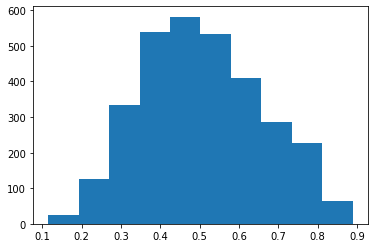

In [159]:
plt.hist(dftest['ALWAYS'])
a = dftest['ALWAYS'] >= .7
b = dftest[a]

x = dftest['ALWAYS'] <= .3
y = dftest[x]

In [160]:
c = b['fips']
d = c.value_counts()
e = d.index

z = y['fips']
x = z.value_counts()
w = x.index

In [161]:
y

,Unnamed: 0,Unnamed: 0.1,CTYNAME,STCOU,Landarea,POPESTIMATE2019,Unnamed: 0.1.1,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,...,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,COUNTYFP,Unnamed: 0.1.1.1,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date_y,county,state_y,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths,_merge,popdensity
9,2245.0,2244.0,"Adams, IA",NaN,424.95,3602.0,2244.0,3602.0,1799.0,1803.0,191.0,103.0,88.0,406.0,200.0,206.0,157.0,75.0,82.0,221.0,120.0,101.0,2928.0,1461.0,1467.0,2848.0,1421.0,1427.0,1099.0,568.0,531.0,759.0,386.0,373.0,1016.0,511.0,505.0,852.0,404.0,448.0,...,309.0,159.0,150.0,232.0,126.0,106.0,228.0,115.0,113.0,171.0,84.0,87.0,112.0,50.0,62.0,109.0,29.0,80.0,47.0,46.0,48.5,19003.0,789.0,0.148,0.110,0.150,0.311,0.281,2021-01-10,Adams,IA,19003.0,288.0,3.0,288.0,NaN,NaN,NaN,both,8.476291
10,2538.0,2537.0,"Adams, ID",NaN,1361.86,4294.0,2537.0,4294.0,2207.0,2087.0,169.0,78.0,91.0,382.0,216.0,166.0,194.0,99.0,95.0,187.0,96.0,91.0,3644.0,1860.0,1784.0,3549.0,1814.0,1735.0,1074.0,547.0,527.0,745.0,382.0,363.0,1333.0,650.0,683.0,1284.0,686.0,598.0,...,521.0,255.0,266.0,478.0,253.0,225.0,337.0,197.0,140.0,228.0,120.0,108.0,136.0,74.0,62.0,105.0,42.0,63.0,55.5,55.3,55.9,16003.0,551.0,0.094,0.216,0.218,0.218,0.254,2021-01-10,Adams,ID,16003.0,287.0,3.0,219.0,NaN,68.0,NaN,both,3.153041
14,1098.0,1097.0,"Adams, ND",NaN,988.22,2216.0,1097.0,2216.0,1098.0,1118.0,118.0,59.0,59.0,214.0,108.0,106.0,95.0,53.0,42.0,129.0,69.0,60.0,1839.0,901.0,938.0,1789.0,878.0,911.0,640.0,338.0,302.0,439.0,231.0,208.0,589.0,287.0,302.0,632.0,291.0,341.0,...,194.0,99.0,95.0,176.0,88.0,88.0,142.0,70.0,72.0,103.0,50.0,53.0,97.0,48.0,49.0,114.0,35.0,79.0,50.4,48.5,52.4,38001.0,1986.0,0.219,0.166,0.189,0.233,0.193,2021-01-10,Adams,ND,38001.0,209.0,2.0,209.0,NaN,0.0,NaN,both,2.242416
19,24.0,23.0,"Adams, WI",NaN,648.00,20220.0,23.0,20220.0,10760.0,9460.0,678.0,369.0,309.0,1445.0,725.0,720.0,725.0,354.0,371.0,1097.0,624.0,473.0,17707.0,9487.0,8220.0,17372.0,9312.0,8060.0,5474.0,3205.0,2269.0,3836.0,2313.0,1523.0,6341.0,3303.0,3038.0,6098.0,3072.0,3026.0,...,2073.0,1081.0,992.0,1986.0,996.0,990.0,1624.0,851.0,773.0,1230.0,628.0,602.0,735.0,373.0,362.0,523.0,224.0,299.0,54.8,53.2,56.3,55001.0,3049.0,0.163,0.189,0.227,0.213,0.208,2021-01-10,Adams,WI,55001.0,1521.0,13.0,1376.0,11.0,145.0,2.0,both,31.203704
37,934.0,933.0,"Alfalfa, OK",NaN,864.18,5702.0,933.0,5702.0,3403.0,2299.0,270.0,154.0,116.0,590.0,307.0,283.0,245.0,131.0,114.0,317.0,162.0,155.0,4718.0,2878.0,1840.0,4597.0,2811.0,1786.0,2019.0,1297.0,722.0,1521.0,1036.0,485.0,1604.0,1041.0,563.0,1155.0,572.0,583.0,...,386.0,224.0,162.0,363.0,210.0,153.0,231.0,119.0,112.0,221.0,98.0,123.0,170.0,77.0,93.0,170.0,68.0,102.0,43.9,43.5,44.9,40003.0,2128.0,0.203,0.096,0.188,0.250,0.262,2021-01-10,Alfalfa,OK,40003.0,986.0,5.0,NaN,5.0,NaN,NaN,both,6.598162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,1649.0,1648.0,"Wright, MO",NaN,682.30,18289.0,1648.0,18289.0,8970.0,9319.0,1323.0,711.0,612.0,2248.0,1149.0,1099.0,1132.0,536.0,596.0,1332.0,685.0,647.0,14131.0,6836.0,7295.0,13586.0,6574.0,7012.0,6132

In [ ]:
for m, x in enumerate(w):
  y = dftimed111['fips'] == x
  z = dftimed111[y]
  z.sort_values(by='date', inplace=True)
  if m == 0:
    dftimed4 = pd.DataFrame(data=z)
  else:
    dftimed4 = pd.concat([dftimed4, z], ignore_index=True)

In [163]:
dftimed4.shape

(63981, 10)

In [ ]:
for m, x in enumerate(e):
  y = dftimed111['fips'] == x
  z = dftimed111[y]
  z.sort_values(by='date', inplace=True)
  if m == 0:
    dftimed5 = pd.DataFrame(data=z)
  else:
    dftimed5 = pd.concat([dftimed5, z], ignore_index=True)

In [165]:
dftimed4['hue'] = 0
dftimed5['hue'] = 1
dftimed6 = pd.concat([dftimed4, dftimed5], ignore_index=True)

In [166]:
x = dftimed4['date'].value_counts()
y = x.index
b1 = []
b11 = []
b12 = []
b13 = []
for p, u in enumerate(y):
  l = dftimed4['date'] == u
  m = dftimed4[l]
  n = np.mean(m['casegrowth'])
  b1.append(n)
  b11.append(u)
  b12.append(0)
  b13.append(p)

x = dftimed5['date'].value_counts()
y = x.index
b2 = []
b21 = []
b22 = []
b23 = []
for p, u in enumerate(y):
  l = dftimed5['date'] == u
  m = dftimed5[l]
  n = np.mean(m['casegrowth'])
  b2.append(n)
  b21.append(u)
  b22.append(1)
  b23.append(p)


In [167]:
x = dftimed6['cases'].value_counts()

b3 = []
b31 = []
b32 = []
b33 = []
for p, u in enumerate(x):
  l = dftimed6['date'] == u
  m = dftimed6[l]
  n = np.mean(m['casegrowth'])
  b3.append(n)
  b31.append(u)
  b32.append(1)
  b33.append(p)

In [168]:
dftimed4['index1'] = [x for x in range(len(dftimed4))]
dftimed5['index1'] = [x for x in range(len(dftimed5))]

In [169]:
def weekaverage(x):
  'weekly average growth rates'
  sometin = []
  sometinelse = []
  for y in x:
    if len(sometin) == 7:
      z = np.mean(sometin)
      sometinelse.append(y)
      sometin = []
      sometin.append(y)
    else:
      sometin.append(y)
  return sometinelse

In [170]:
def growth(x):
  alacart = []
  'establishes weekly average growth rates befoer and after'
  for y, z in enumerate(x['cases']):
    if y == 0:
      alacart.append(0)
      h = z
    else:
      a = (np.log(z) - np.log(h)) *100
      alacart.append(a)
      h = z
  averagesperweek = weekaverage(alacart)
  return averagesperweek

In [171]:
dflow = pd.DataFrame(data=b1)
dflow['date'] = b11
dflow['hue'] = b12

dfhi = pd.DataFrame(data=b2)
dfhi['date'] = b21
dfhi['hue'] = b22

In [172]:
dflow['averagecasegrowth'] = dflow[0]
dflow.drop(labels = 0, axis=1, inplace=True)

dfhi['averagecasegrowth'] = dfhi[0]
dfhi.drop(labels = 0, axis=1, inplace=True)

In [173]:
dfhi.sort_values(by='date', inplace=True)
dflow.sort_values(by='date', inplace=True)

In [174]:
dfhi.reset_index(inplace=True)
dflow.reset_index(inplace=True)
dfhi['index1'] = dfhi.index
dflow['index1'] = dflow.index
dfhilow = pd.concat([dfhi, dflow])
dfhilow.reset_index(inplace=True)


In [175]:
dfhilow

,level_0,index,date,hue,averagecasegrowth,index1
0,0,345,2020-01-21,1,0.000000,0
1,1,347,2020-01-22,1,0.000000,1
2,2,346,2020-01-23,1,0.000000,2
3,3,344,2020-01-24,1,0.000000,3
4,4,343,2020-01-25,1,0.000000,4
...,...,...,...,...,...,...
642,294,76,2020-12-29,0,6.824701,294
643,295,13,2020-12-30,0,10.545817,295
644,296,47,2020-12-31,0,9.904382,296
645,297,21,2021-01-01,0,4.107570,297


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


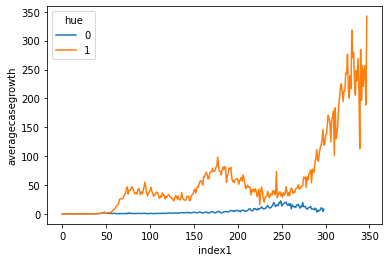

In [176]:
import seaborn as sns

sns.lineplot('index1', 'averagecasegrowth', hue='hue', data=dfhilow)

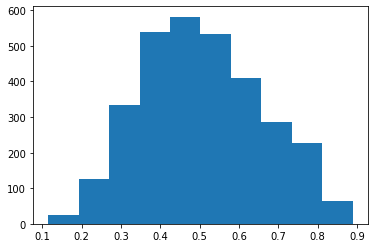

In [177]:
plt.hist(dftest['ALWAYS'])
a = dftest['ALWAYS'] >= .7
b = dftest[a]

x = dftest['ALWAYS'] <= .3
y = dftest[x]

In [178]:
dftimed6.sort_values(by='date', inplace=True)
b = dftimed6['date']



In [179]:
b.drop_duplicates(inplace=True, keep='first')
sio = [x for x in range(len(b))]

In [180]:
b = pd.DataFrame(b)

In [181]:
b['index'] = sio

In [182]:
b.index = b['date']
b.drop(labels = 'date', axis=1)

,index
date,
2020-01-21,0
2020-01-22,1
2020-01-23,2
2020-01-24,3
2020-01-25,4
...,...
2020-12-29,343
2020-12-30,344
2020-12-31,345


In [183]:
ss123 = []
for x in dftimed6['date']:
  y = b.loc[b['date']==x, 'index']
  y = list(y)
  y = y[0]

  ss123.append(y)



In [184]:
len(ss123)

183687

In [185]:
dftimed6['index2'] = ss123

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


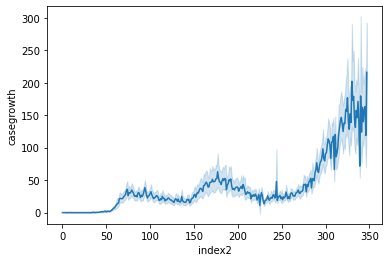

In [186]:
sns.lineplot('index2', 'casegrowth', data=dftimed6)

In [187]:
ss123 = []
for x in dftimed111['date']:
  y = b.loc[b['date']==x, 'index']
  y = list(y)
  y = y[0]

  ss123.append(y)
dftimed111['index2'] = ss123


In [188]:
dftimed111['hue'] = 2

In [189]:
dftimed111.head()

,Unnamed: 0,date,county,state,fips,cases,deaths,CTYNAME,index1,casegrowth,index2,hue
0,0,2020-01-21,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",0,0,0,2
1,1,2020-01-22,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",1,0,1,2
2,2,2020-01-23,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",2,0,2,2
3,3,2020-01-24,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",4,0,3,2
4,4,2020-01-25,Snohomish,WA,53061.0,1,0.0,"Snohomish, WA",7,0,4,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


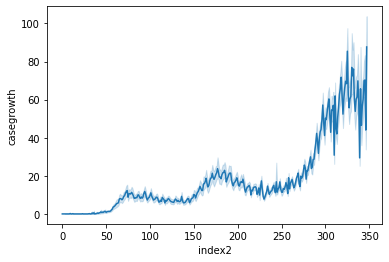

In [190]:
sns.lineplot('index2', 'casegrowth', data=dftimed111)


In [191]:
dftimedfinal = pd.concat([dftimed6, dftimed111], ignore_index=True)

In [192]:
dftimedfinal.rename(columns={'index2':'Day', 'casegrowth':'Case Growth', 'hue':'Care_index'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


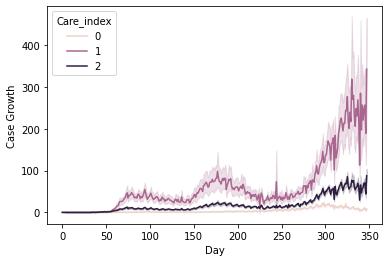

In [193]:
sns.lineplot('Day', 'Case Growth', hue='Care_index', data=dftimedfinal);

In [ ]:
a = dftimedfinal['hue'] == 0
b = dftimedfinal['hue'] == 1
c = dftimedfinal['hue'] == 2

a = dftimedfinal[a]
b = dftimedfinal[b]
c = dftimedfinal[c]

In [ ]:
a.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

In [ ]:
sns.lineplot('Day', 'Case Growth', data=a);

In [ ]:
b.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

In [ ]:
sns.lineplot('Day', 'Case Growth', data=b);


In [ ]:
c.rename(columns={'index2':'Day', 'casegrowth':'Case Growth'}, inplace=True)

In [ ]:
sns.lineplot('Day', 'Case Growth', data=c);
#This visualiztion is the daily Growth rate for the entire United States
